In [1]:
#參考資料 https://ithelp.ithome.com.tw/articles/10197110
# import函式庫
from sklearn import datasets, metrics, svm, tree, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 讀入iris資料集
iris = datasets.load_iris()
# 定義feature及label
iris_data = iris.data
iris_label = iris.target

# 顯示iris的內容
print(pd.DataFrame(data=iris['data'], columns=iris['feature_names']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [160]:
# 將資料分成training及testing，比例為8:2，並亂序
train_data, test_data, train_label, test_label = train_test_split(iris_data,iris_label, test_size=0.2, shuffle=True)

In [161]:
# 前處理，將所有特徵標準化，能夠有效地讓模型快速收斂
# 使平均值為0，標準差為1
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

*以下為 C = 1.0 時的輸出結果*

In [162]:
# 使用Logistic regression演算法
classifier = linear_model.LogisticRegression(C=1.0)
classifier.fit(train_data,train_label)

LogisticRegression()

In [163]:
# 輸出預測結果及正確結果
predicted = classifier.predict(test_data)
print('predicted:', predicted)
print('true:     ', test_label)

predicted: [0 0 2 1 1 2 2 1 0 1 1 2 2 1 0 1 1 0 2 2 0 0 1 1 0 1 1 1 1 2]
true:      [0 0 2 1 1 2 2 1 0 1 1 1 2 1 0 1 1 0 2 2 0 0 1 1 0 1 1 1 1 2]


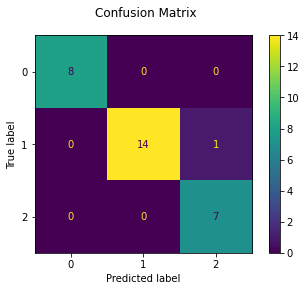

In [164]:
# 顯示混淆矩陣
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [165]:
# 顯示結果報表
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# f1-score= 2 * precision * recall/(recision + recall)，為precision和recall的harmonic mean調和平均數
# support為實際手寫數字的總數
print(f"Classification report for classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30




*以下為 C = 0.5 時的輸出結果*

In [166]:
# 使用Logistic regression演算法
classifier = linear_model.LogisticRegression(C=0.5)
classifier.fit(train_data,train_label)

LogisticRegression(C=0.5)

In [167]:
# 輸出預測結果及正確結果
predicted = classifier.predict(test_data)
print('predicted:', predicted)
print('true:     ', test_label)

predicted: [0 0 2 1 1 2 2 1 0 1 1 2 2 1 0 1 1 0 2 2 0 0 1 2 0 1 1 1 1 2]
true:      [0 0 2 1 1 2 2 1 0 1 1 1 2 1 0 1 1 0 2 2 0 0 1 1 0 1 1 1 1 2]


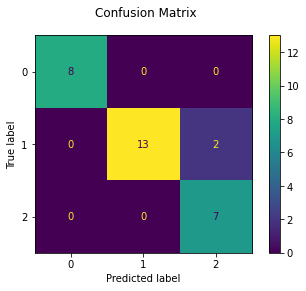

In [168]:
# 顯示混淆矩陣
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [169]:
# 顯示結果報表
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# f1-score= 2 * precision * recall/(recision + recall)，為precision和recall的harmonic mean調和平均數
# support為實際手寫數字的總數
print(f"Classification report for classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classification report for classifier LogisticRegression(C=0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.87      0.93        15
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.96      0.93        30
weighted avg       0.95      0.93      0.94        30




*以下為 C = 1.5 時的輸出結果*

In [170]:
# 使用Logistic regression演算法
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(train_data,train_label)

LogisticRegression(C=1.5)

In [171]:
# 輸出預測結果及正確結果
predicted = classifier.predict(test_data)
print('predicted:', predicted)
print('true:     ', test_label)

predicted: [0 0 2 1 1 2 2 1 0 1 1 2 2 1 0 1 1 0 2 2 0 0 1 1 0 1 1 1 1 2]
true:      [0 0 2 1 1 2 2 1 0 1 1 1 2 1 0 1 1 0 2 2 0 0 1 1 0 1 1 1 1 2]


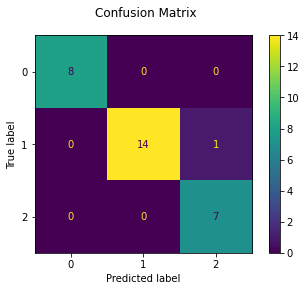

In [172]:
# 顯示混淆矩陣
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [173]:
# 顯示結果報表
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# f1-score= 2 * precision * recall/(recision + recall)，為precision和recall的harmonic mean調和平均數
# support為實際手寫數字的總數
print(f"Classification report for classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classification report for classifier LogisticRegression(C=1.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30


